<a href="https://colab.research.google.com/github/fourfeatherz/DS2002S25/blob/main/python/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [1]:
import sqlite3

#set up the connection to the database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

#our crete table statement

tablestatement = '''
DROP TABLE IF EXISTS heroes;
DROP TABLE IF EXISTS villains;
DROP TABLE IF EXISTS battles;

CREATE TABLE heroes (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name VARCHAR(50) NOT NULL,
  power VARCHAR(50),
  team VARCHAR(50)
);

CREATE TABLE villains (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name VARCHAR(50) NOT NULL,
  evil_plan VARCHAR(50)
);

CREATE TABLE battles (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  hero_id INTEGER,
  villain_id INTEGER,
  outcome VARCHAR(50)

);
'''

#execute
cursor.executescript(tablestatement)
conn.commit()
print("we got database")



we got database


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [2]:
import pandas as pd
import numpy as np
heroes_df = pd.read_csv("heroes.csv")
heroes_data = heroes_df.values.tolist()
villains_df = pd.read_csv("villains.csv")
villians_data = villains_df.values.tolist()
battles_df = pd.read_csv("battles.csv")
battles_data = battles_df.values.tolist()



cursor.executemany('''
    INSERT INTO heroes (id, name, power, team)
    VALUES (?, ?, ?, ?)
''', heroes_data)


cursor.executemany('''
    INSERT INTO villains (id, name, evil_plan)
    VALUES (?, ?, ?)
''', villians_data)


cursor.executemany('''
    INSERT INTO battles (id, hero_id, villain_id, outcome)
    VALUES (?, ?, ?, ?)
''', battles_data)

conn.commit()

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [4]:
cursor.execute("SELECT name, power FROM heroes")
rows = cursor.fetchall()

print("All heroes and power data:")
for row in rows:
    print(row)

All heroes and power data:
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')


In [6]:
cursor.execute("SELECT * FROM battles WHERE outcome = 'Hero Wins'")
rows = cursor.fetchall()

print("All heroes battles won:")
for row in rows:
    print(row)

All heroes battles won:
(2, 9, 3, 'Hero Wins')
(5, 1, 7, 'Hero Wins')
(7, 9, 8, 'Hero Wins')
(8, 3, 2, 'Hero Wins')
(9, 7, 5, 'Hero Wins')
(13, 8, 9, 'Hero Wins')
(20, 3, 4, 'Hero Wins')
(29, 3, 5, 'Hero Wins')
(30, 5, 5, 'Hero Wins')


In [7]:
cursor.execute("SELECT name, evil_plan FROM villains")
rows = cursor.fetchall()

print("All villains and plan data:")
for row in rows:
    print(row)

All villains and plan data:
('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Man')
('Magneto', 'Mutant supremacy')
('Red Skull', 'Revive Hydra')


In [8]:
cursor.execute("""
SELECT heroes.name, COUNT(battles.id) AS battle_count
FROM battles
JOIN heroes ON battles.hero_id = heroes.id
GROUP BY heroes.name
ORDER BY battle_count DESC
LIMIT 1;
""")
row = cursor.fetchall()

print("All villains and plan data:")
print(row)

All villains and plan data:
[('Batman', 7)]


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [11]:
new_tab = """
DROP TABLE IF EXISTS sidekick;

CREATE TABLE sidekick (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name VARCHAR(50) NOT NULL,
  power VARCHAR(50),
  hero_id INTEGER
);

"""
cursor.executescript(new_tab)

sidekicks_data = [
    (1, "Robin", "Acrobatics", 3),
    (2, "Bucky Barnes", "Super Soldier", 2),
    (3, "War Machine", "Powered Armor", 2),
    (4, "Supergirl", "Super Strength", 4),
    (5, "Falcon", "Flight", 2),
]


cursor.executemany('''
INSERT INTO sidekick (id, name, power, hero_id) VALUES (?, ?, ?, ?)
''', sidekicks_data)

conn.commit()


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

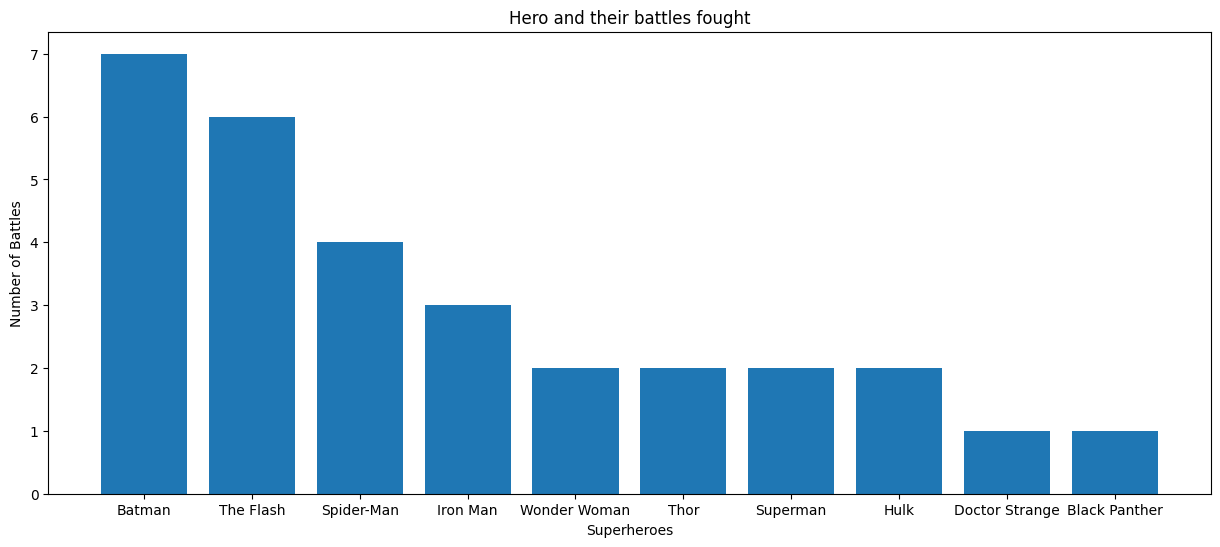

In [20]:
import matplotlib.pyplot as plt

statement = """
SELECT heroes.name, COUNT(battles.id) AS battle_count
FROM battles
JOIN heroes ON battles.hero_id = heroes.id
GROUP BY heroes.name
ORDER BY battle_count DESC
"""

cursor.execute(statement)

rows = cursor.fetchall()

# print(rows)
name = []
battles = []

for i in range(len(rows)):
  name.append(rows[i][0])
  battles.append(rows[i][1])

plt.figure(figsize=(15, 6))
plt.bar(name,battles)
plt.xlabel("Superheroes")
plt.ylabel("Number of Battles")
plt.title("Hero and their battles fought")
plt.show()


## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!